Análise comentada do código OpenCV
Um tutorial simples para trata,mento de imagens em openCV.
O tutorial tem caráter meramente demonstrativo e deve ser adaptado apra cada situação

Mostramos como os canais b, g e r podem ser separados e manipulados, assim como os canais de matiz, saturação e brilho (h, s, v)

Nosso objetivo principal é mostrar como alguns tratamentos simples, como correção de exposição, como o escurecimento de uma imagem e, por fim, saturação, podem ser artificialmente corrigidos
de maneira muito simples.

Importações e configuração:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.display import Image
Importa as bibliotecas essenciais: OpenCV para processamento de imagem, matplotlib para visualização, numpy para manipulação de arrays.

Entrada do caminho da imagem:
img_caminho = input("type the path to your image")
Solicita ao usuário o caminho da imagem a ser processada.

Exibição direta da imagem (não via matplotlib):
Image(img_caminho)
Usa o display do IPython para mostrar a imagem no notebook sem processá-la ainda.

Leitura da imagem:
img1 = cv.imread(img_caminho, 1)
Lê a imagem em modo colorido padrão (BGR). A seguir, imprime o array da imagem, seu shape e tipo de dado.

Exibição da imagem (com erro conceitual):
plt.imshow(img1, cmap = 'gray')

Inversão dos canais:
img1_canais_invertidos = img1[:,:,::-1]
Inverte os canais BGR para RGB (forma rápida). Correto para exibir com matplotlib.

Divisão dos canais e visualização individual:
b, g, r = cv.split(img_canais)
Separa os três canais da imagem. Depois são mostrados separadamente como imagens em tons de cinza.

Subplots para mostrar os três canais juntos:
Facilita a comparação dos canais visualmente.

Criação de matriz nula (zero):
zero = np.zeros_like(b)
Cria uma imagem "preta" para usar em fusões e manipulações de canais.

Fusão de canais na ordem RGB:
imagem_fundida = cv.merge([r, g, b])
Corrige visualização e mostra imagem com matplotlib no padrão certo.

Conversão para HSV:
img_hsv = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
Converte a imagem para Hue (matiz), Saturation (saturação) e Value (brilho).

Visualização dos canais H e V:
Mostra a distribuição de tons e de brilhos (luz/sombra).

Criação de matriz de uns e escurecimento:
matrix = np.ones(imagem_fundida.shape, dtype="uint8") * 50
Subtrai essa matriz da imagem para escurecê-la.

Correção da saturação:
saturacao_corrigir = np.ones_like(b) * 10
Cria um vetor 2d com todos os valores iguais a 10, representando um canal de sturação para
cada pixel, que será subtraída do canal de saturação para reduzi-la (imagem menos saturada).

Criação da matriz HSV para correção:
matrix_corrigir_saturacao = cv.merge([zero, saturacao_corrigir, zero])
Usa uma matriz de saturação com 10 pontos (S) com o valor a ser subtraído, e zeros nos outros canais.

Aplicação da correção e conversão de volta para BGR:
Subtrai da imagem em HSV e depois converte de volta para BGR para exibir com matplotlib.

Comparação entre imagem original e com saturação corrigida:
Mostra lado a lado para avaliação visual do efeito da correção.

In [322]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.display import Image

In [323]:
img_caminho = input("type the path to your image")

type the path to your image imagens_teste/Lessingianthus_bardanoides.jpg


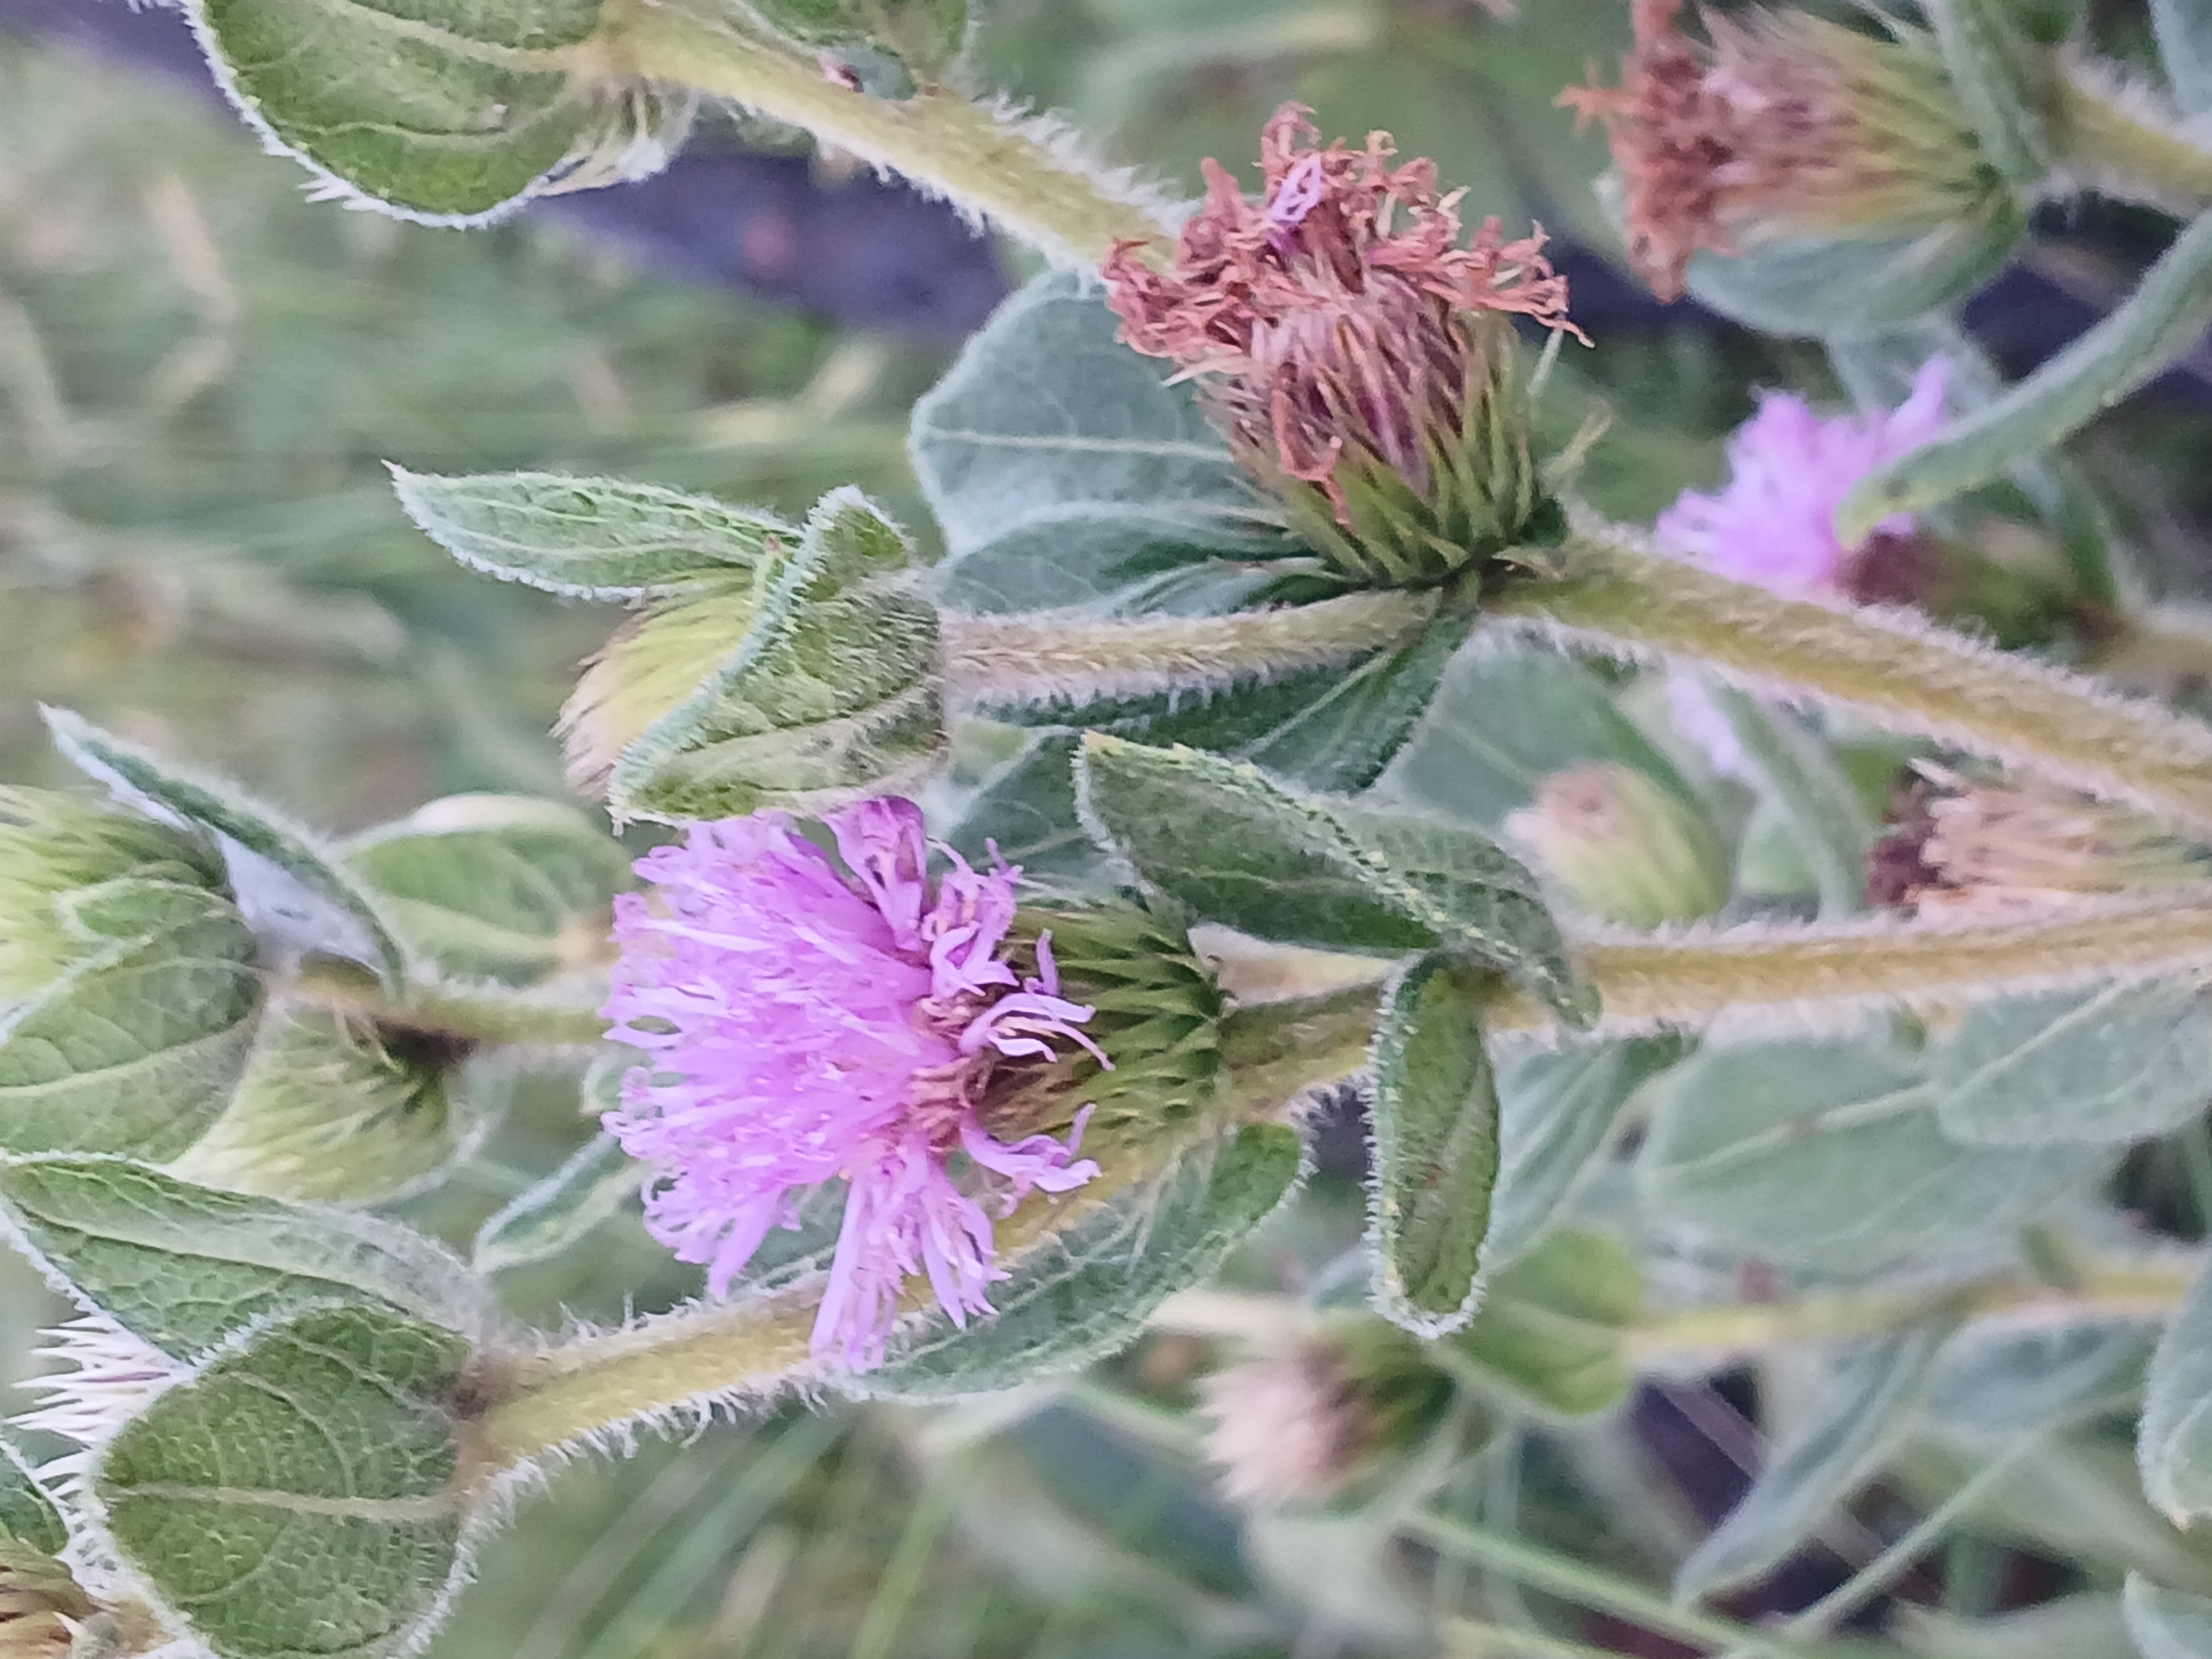

In [324]:
Image(img_caminho)

In [325]:
img1 = cv.imread(img_caminho, 1) #0 quer dizer ler em escala de cinza, 1 quer dizer BGR (Blue, Green and Red)

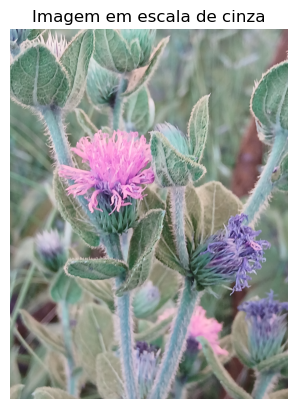

In [326]:
plt.imshow(img1, cmap = 'gray')
plt.title("Imagem em escala de cinza")
plt.axis("off") #esconde os eixos
plt.show()

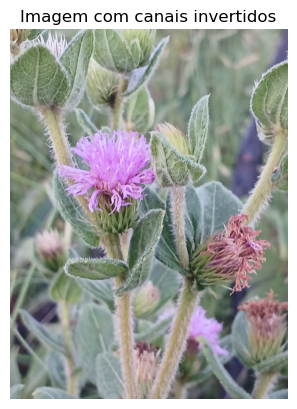

In [327]:
img1_canais_invertidos = img1[:,:,::-1]
plt.imshow(img1_canais_invertidos)
plt.title("Imagem com canais invertidos")
plt.axis("off")
plt.show()

In [328]:
img_canais = cv.imread(img_caminho, cv.IMREAD_COLOR) 

In [329]:
b, g, r = cv.split(img_canais)

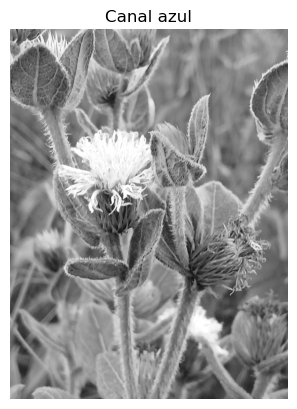

In [330]:
plt.imshow(b, cmap = 'gray')
plt.title("Canal azul")
plt.axis("off")
plt.show()

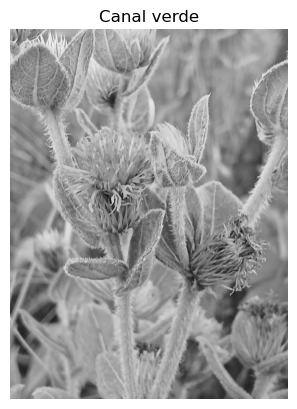

In [331]:
plt.imshow(g, cmap = 'gray');plt.title('green channel')
plt.title("Canal verde")
plt.axis("off")
plt.show()

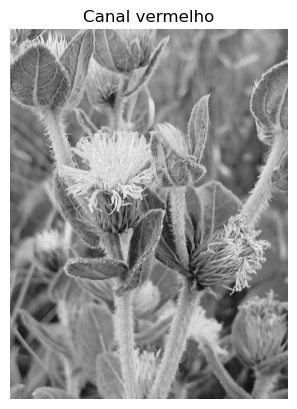

In [332]:
plt.imshow(r, cmap = 'gray')
plt.title("Canal vermelho")
plt.axis("off")
plt.show()

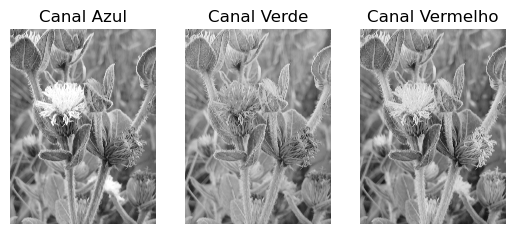

In [333]:
plt.subplot(1, 3, 1)
plt.imshow(b, cmap='gray')
plt.axis("off")
plt.title('Canal Azul')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.axis("off")
plt.title('Canal Verde')

plt.subplot(1, 3, 3)
plt.imshow(r, cmap='gray')
plt.axis("off")
plt.title('Canal Vermelho')

plt.show()

In [334]:
zero = np.zeros_like(b)

In [335]:
imagem_fundida = cv.merge((r, g, b)); plt.imshow(imagem_fundida);plt.title("Canais fundidos")

Text(0.5, 1.0, 'Canais fundidos')

In [336]:
img_hsv = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)

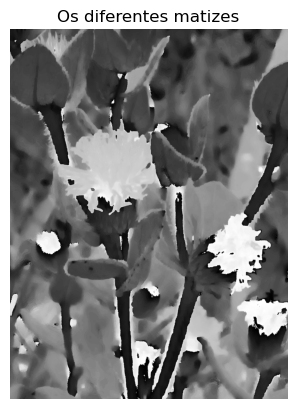

In [337]:
plt.imshow(h, cmap = 'gray');plt.title('Os diferentes matizes') 
plt.axis("off")
plt.show()

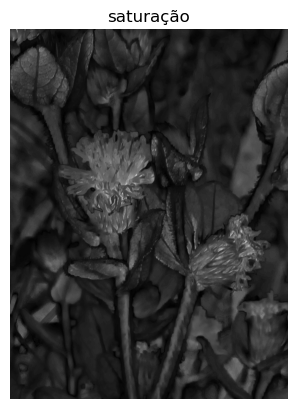

In [338]:
plt.imshow(s, cmap = 'gray');plt.title('saturação')
plt.axis("off")
plt.show()

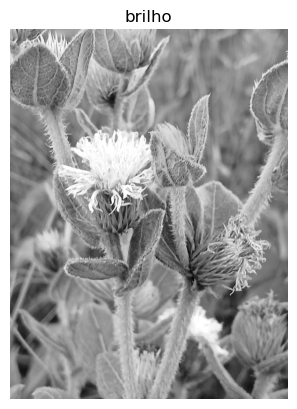

In [339]:
plt.imshow(v, cmap = 'gray');plt.title('brilho') 
plt.axis("off")
plt.show()

In [340]:
imagem_fundida.shape

(4080, 3060, 3)

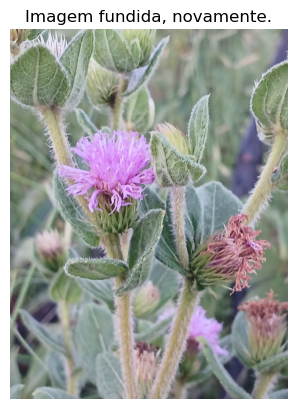

In [342]:
plt.imshow(imagem_fundida)
plt.title("Imagem fundida, novamente.")
plt.axis("off")
plt.show()

In [343]:
matrix = np.ones(imagem_fundida.shape, dtype = "uint8")

In [344]:
matrix = matrix * 50

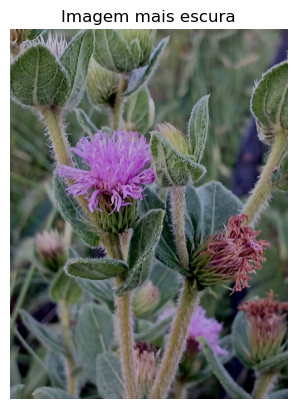

In [345]:
image_darker = cv.subtract(imagem_fundida, matrix)
plt.imshow(image_darker)
plt.title("Imagem mais escura")
plt.axis("off")
plt.show()

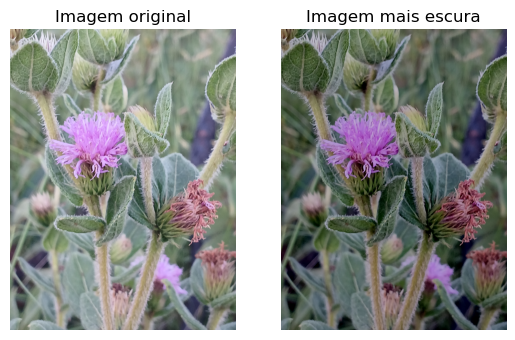

In [346]:
plt.subplot(1, 2, 1)
plt.imshow(imagem_fundida)
plt.axis("off")
plt.title('Imagem original')

plt.subplot(1, 2, 2)
plt.imshow(image_darker)
plt.axis("off")
plt.title('Imagem mais escura')

plt.show()

In [348]:
img_hsv = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)

In [349]:
saturacao_corrigir = np.ones_like(b)
saturacao_corrigir = saturacao_corrigir * 10

In [350]:
matrix_corrigir_saturacao = cv.merge([zero, saturacao_corrigir, zero])

In [351]:
imagem_com_saturacao_corrigida = cv.subtract(img_hsv, matrix_corrigir_saturacao)

In [352]:
img_bgr = cv.cvtColor(imagem_com_saturacao_corrigida, cv.COLOR_HSV2BGR)

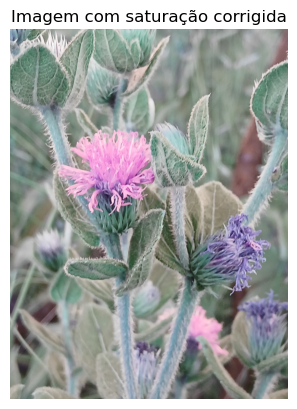

In [353]:
plt.imshow(img_bgr)
plt.title("Imagem com saturação corrigida")
plt.axis("off")
plt.show()

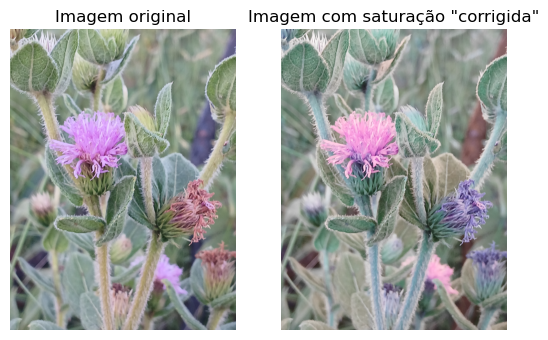

In [354]:
plt.subplot(1, 2, 1)
plt.imshow(imagem_fundida)
plt.axis("off")
plt.title('Imagem original')

plt.subplot(1, 2, 2)
plt.imshow(img_bgr)
plt.axis("off")
plt.title('Imagem com saturação "corrigida"')

plt.show()